# WeatherPy
* Warmer near equator (0degLat). BUT southern hem warmer "winter" d/t tilt earth axis.
* No assoc b/n lat & cloudiness. BUT band of cities with 0, 80, and 100% cloudiness.
* No assoc b/n lat & wind speed. BUT northern hem cities with >20 mph winds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lats_lngs_tuples = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs_tuples = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs_tuples:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))
# print(cities[27])


611


* Weather check each city using a series of successive API calls.
* Print log as being processed (with city number and city name).

In [3]:
# # Test url, response, and collection of data elements.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# test_print = []
# query_url = f"{url}appid={api_key}&units={units}&q=boston"
# test_response = requests.get(query_url).json()
# test_print.append(test_response['name'])
# print(test_print)           # ['Boston']

# # {'coord': {'lon': -71.06, 'lat': 42.36}, 
# #  'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 
# #  'base': 'stations', 
# #  'main': {'temp': 9.32, 'pressure': 1019, 'humidity': 37, 'temp_min': 7.22, 'temp_max': 11.11}, 
# #  'visibility': 16093, 
# #  'wind': {'speed': 5.7, 'deg': 170}, 
# #  'clouds': {'all': 75}, 
# #  'dt': 1553197806,                    # # Note: format of dates is epoch-specific, hopefully ISO-8601
# #  'sys': {'type': 1, 'id': 3486, 'message': 0.0094, 'country': 'US', 'sunrise': 1553165173, 'sunset': 1553209001}, 
# #  'id': 4930956, 
# #  'name': 'Boston', 
# #  'cod': 200}

In [4]:
# Store returned data in lists, to later create a dataframe. 
# Store a list of exception/error cities, for error checking
lat = []
lng = []
maxtemp = []
humid = []
cloud = []
windsp = []
country = []
date = []
city_errors = []
cities_succ = []

In [5]:
# Build the query URL; for-loop through the list of random cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
for city_number in range(len(cities)):
# for city_number in range(10):            # for testing (a late realization)
    query_url = f"{url}appid={api_key}&units={units}&q={cities[city_number]}"
    weather_response = requests.get(query_url).json()
    # Data recorded in an exception split; missing values won't stop for-loop.
    # Order of "try" actions irrelevant; ALL exceptions skip ALL of "try".
    try:
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        maxtemp.append(weather_response['main']['temp_max'])
        humid.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        windsp.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        cities_succ.append(weather_response['name'])
        # Use "loop variable" to print log of successful/error iterations. 
        # Store cities to success AND error lists, for data validation.
        print(f"Response url {cities[city_number]}, city #{city_number}.")
    except (KeyError, IndexError):
        city_errors.append(cities[city_number])
        print(f"Missing field/result... ... ...skipping city= {cities[city_number]} #{city_number}.")
        

Response url ushuaia, city #0.
Response url rikitea, city #1.
Response url bandarbeyla, city #2.
Response url albany, city #3.
Response url sao filipe, city #4.
Response url iqaluit, city #5.
Response url bluff, city #6.
Response url busselton, city #7.
Response url mahebourg, city #8.
Response url jamestown, city #9.
Response url east london, city #10.
Response url baykit, city #11.
Response url vaini, city #12.
Response url berdigestyakh, city #13.
Response url vallenar, city #14.
Response url bisert, city #15.
Response url vigrestad, city #16.
Response url athabasca, city #17.
Response url mataura, city #18.
Response url mikkeli, city #19.
Response url hermanus, city #20.
Response url uglovka, city #21.
Response url orlik, city #22.
Response url cape town, city #23.
Response url wajima, city #24.
Response url puerto ayora, city #25.
Response url norman wells, city #26.
Missing field/result... ... ...skipping city= taolanaro #27.
Response url kintinku, city #28.
Response url narsaq, 

Response url katsuura, city #219.
Response url camacha, city #220.
Response url kajaani, city #221.
Response url katobu, city #222.
Response url rocha, city #223.
Response url panaba, city #224.
Response url tasiilaq, city #225.
Missing field/result... ... ...skipping city= belushya guba #226.
Response url jacareacanga, city #227.
Response url mahajanga, city #228.
Response url ketchikan, city #229.
Response url kulhudhuffushi, city #230.
Response url wangaratta, city #231.
Response url kutum, city #232.
Response url dzhalil, city #233.
Response url ishinomaki, city #234.
Response url sampit, city #235.
Response url kot samaba, city #236.
Response url siyabuswa, city #237.
Response url kavieng, city #238.
Response url te anau, city #239.
Response url liberal, city #240.
Response url lompoc, city #241.
Response url dicabisagan, city #242.
Response url chongwe, city #243.
Missing field/result... ... ...skipping city= cumaribo #244.
Response url uruguaiana, city #245.
Response url namie, 

Response url urucara, city #440.
Response url portland, city #441.
Response url bhainsdehi, city #442.
Response url sabratah, city #443.
Response url makat, city #444.
Response url bridlington, city #445.
Response url arona, city #446.
Response url marsh harbour, city #447.
Response url lambarene, city #448.
Missing field/result... ... ...skipping city= maneadero #449.
Response url saint-francois, city #450.
Missing field/result... ... ...skipping city= ambodifototra #451.
Response url grindavik, city #452.
Response url ilam, city #453.
Response url erenhot, city #454.
Response url broome, city #455.
Response url chernyshevskiy, city #456.
Response url dryden, city #457.
Missing field/result... ... ...skipping city= toliary #458.
Response url kuopio, city #459.
Response url garmsar, city #460.
Missing field/result... ... ...skipping city= nguiu #461.
Response url craigieburn, city #462.
Response url xingcheng, city #463.
Response url mangrol, city #464.
Response url deputatskiy, city #

In [6]:
# # Test print lists, list lengths to check for missing fields, error recording.
# # 624 urls return a result; 68 city_errors out of 626 generated. That doesn't add up.
# # 60 city_errors were recorded, url got responses in 605 out of 607 randomly generated. 
# # 69 'name' error cities; 555 in city_succ & other lists; responses to 623 urls out of 624. 
# # Hmmm... so we need to NOT use the 'name' field to "index" the results dataframe!
print(len(city_errors))
print(len(cities_succ))
# print(*cloud)
# print(*country)
# print(*date)
# print(*humid)
# print(*maxtemp)
# print(*lat)
# print(*lng)
# print(*windsp)              # No missing values
# # print(len(cloud))
# # print(len(country))
# # print(len(date))
# # print(len(humid))
# # print(len(maxtemp))
# # print(len(lat))
# # print(len(lng))
print(len(windsp))
# print(*city_errors)
# # city_errors = all obscure; not submitting/not able to submit weather information?

68
543
543


### Convert Raw Data to DataFrame; Export to csv; Display DataFrame.

In [7]:
cities_responded = list(zip(cities_succ, cloud, country, date, humid, \
                            lat, lng, maxtemp, windsp))
# print(cities_responded)
weather_columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', \
                 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
cities_succ_df = pd.DataFrame(cities_responded, columns=weather_columns)  
cities_succ_df.info()
cities_succ_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
City          543 non-null object
Cloudiness    543 non-null int64
Country       543 non-null object
Date          543 non-null int64
Humidity      543 non-null int64
Lat           543 non-null float64
Lng           543 non-null float64
Max Temp      543 non-null float64
Wind Speed    543 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.3+ KB


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1553515200,86,-54.81,-68.31,5.00,4.10
1,Rikitea,0,PF,1553517658,97,-23.12,-134.97,26.45,4.87
2,Bandarbeyla,0,SO,1553517658,100,9.49,50.81,26.90,4.22
3,Albany,75,US,1553517616,55,42.65,-73.75,2.78,3.60
4,Sao Filipe,44,CV,1553517659,97,14.90,-24.50,20.95,4.82


In [8]:
cities_lat_data = pd.DataFrame(cities_succ_df)
cities_lat_data.info()
cities_lat_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
City          543 non-null object
Cloudiness    543 non-null int64
Country       543 non-null object
Date          543 non-null int64
Humidity      543 non-null int64
Lat           543 non-null float64
Lng           543 non-null float64
Max Temp      543 non-null float64
Wind Speed    543 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.3+ KB


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1553515200,86,-54.81,-68.31,5.00,4.10
1,Rikitea,0,PF,1553517658,97,-23.12,-134.97,26.45,4.87
2,Bandarbeyla,0,SO,1553517658,100,9.49,50.81,26.90,4.22
3,Albany,75,US,1553517616,55,42.65,-73.75,2.78,3.60
4,Sao Filipe,44,CV,1553517659,97,14.90,-24.50,20.95,4.82


### Plotting the Data
* Use proper labeling, titles (including date of analysis) and axes labels.
* (columns=City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed)
* (Consider colors = Gold, Light Sky Blue, and Light Coral)
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

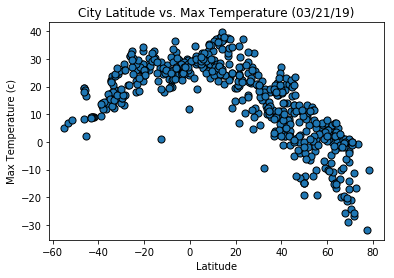

In [9]:
cities_succ_df.plot.scatter(x='Lat', y='Max Temp', s=50, edgecolors='black')
plt.title("City Latitude vs. Max Temperature (03/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.savefig("Images/lat_vs_tempC.png")

#### Latitude vs. Humidity Plot

AttributeError: 'list' object has no attribute 'idmax'

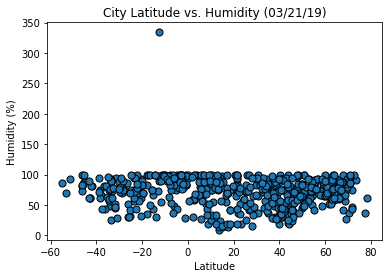

In [18]:
cities_succ_df.plot.scatter(x='Lat', y='Humidity', s=50, edgecolors='black')
plt.title("City Latitude vs. Humidity (03/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/lat_vs_humidC.png")


#### Latitude vs. Cloudiness Plot

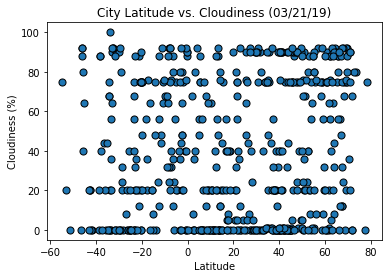

In [11]:
cities_succ_df.plot.scatter(x='Lat', y='Cloudiness', s=50, edgecolors='black')
plt.title("City Latitude vs. Cloudiness (03/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/lat_vs_cloudyC.png")

#### Latitude vs. Wind Speed Plot

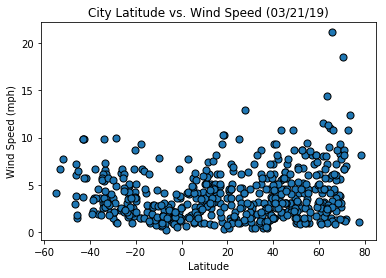

In [12]:
cities_succ_df.plot.scatter(x='Lat', y='Wind Speed', s=50, edgecolors='black')
plt.title("City Latitude vs. Wind Speed (03/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/lat_vs_windyC.png")
# Wind speeds increase with stored energy, esp. late in daylight hours. (Nerdism)

In [24]:
# Output File (CSV) -- 
# cities_lat_data.to_csv('cities_lat_dataC', index=False)

# path_to_output = '/Users/smurphier/Desktop/APIhw6/Images/cities_succF'
# cities_lat_data.to_csv(path_to_output, index=False)

import os
# path = 'Images/cities_lat_dataD'
# print(path)
# cities_lat_data.to_csv(path, index=False)


path_to_output = os.path.join("Images", "cities_succF.csv")
# print(path_to_output)
cities_lat_data.to_csv(path_to_output, index=False)

Images/cities_succF.csv


In [ ]:
# See "trends_weather_data" file for trends discussion. 

In [ ]:
# ANOTHER WAY TO DO THIS HOMEWORK:
for k in range(-180,181,20):
    longlist.append(k)
#longlist=[-180,-160,-140,-120,-100,-8-75,-50,0,50,75,100,150,175]

#list of cities
cityset=set()

for i in range(-90,90,+2):
#use latitude choice from -90 to +90 and get a city closest to that latitude.
    for j in longlist:
        lat=i
        long=j
        city = citipy.nearest_city(lat, long)
        cityset.add(city.city_name)
print(str(len(cityset)))
print(str(len(cnylist)))
.......
    except:
        cntfail +=1
        print("Error in getting data for city " + city)
        print("error code: " + weatherdetails["cod"])
        print("message: " + weatherdetails["message"])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(cntfail))

#store results into a dictionary and convert to a dataframe. 
weatherdict=dict()
weatherdict={"City":citylist,"Cloudiness":cloudiness,"Country_code":cnycode,"Date":date,
             "Humidity":humidity,"Latitude":lat,"Longitude":long,"Max_temp":tempmax,
             "Wind_speed":windspeed}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

# Plotting charts with SEABORN -- more parameters, but more flexiblity
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x_axis=weather_df["Latitude"]
y_axis_maxtemp=weather_df["Max_temp"]
y_axis_humidity=weather_df["Humidity"]
y_axis_cloudiness = weather_df["Cloudiness"]
y_axis_Windspeed = weather_df["Wind_speed"]
## y_axis changes, label changes, nothing else....
sns.regplot(x_axis, y_axis_humidity, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="g", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Humidity, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-0,100)
plt.ylabel("Humidity % ")
plt.savefig("latvshumidity.png")

#Review cities that have temperature greater than 28 deg C.... pretty smart!
weather_df.loc[weather_df["Max_temp"] >= 38]